In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../processed/train/evaluated/paraphrase_humarin_samples_llama-2-7b_230_EVALUATED_05_12_2023.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
kgw_wm_zscore = np.array(df["kgw-wm-zscore"])
non_wm_zscore = np.array(df["non-wm-zscore"])

In [5]:
no_of_paraphrases = 3
wmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))
nmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))

In [6]:
for i in range(1, no_of_paraphrases+1):
    wmarked_paraphrased_scores[i-1] = df[f"kgw-wm-pp-zscore-{i}"]
    nmarked_paraphrased_scores[i-1] = df[f"non-wm-pp-zscore-{i}"]

In [7]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [8]:
comparison(kgw_wm_zscore, non_wm_zscore)

base mean: 18.3657, pp mean: 0.0934
base std: 5.3522, pp mean: 0.9767


In [9]:
image_path = "../results/images/z_score_comparisons_december/"

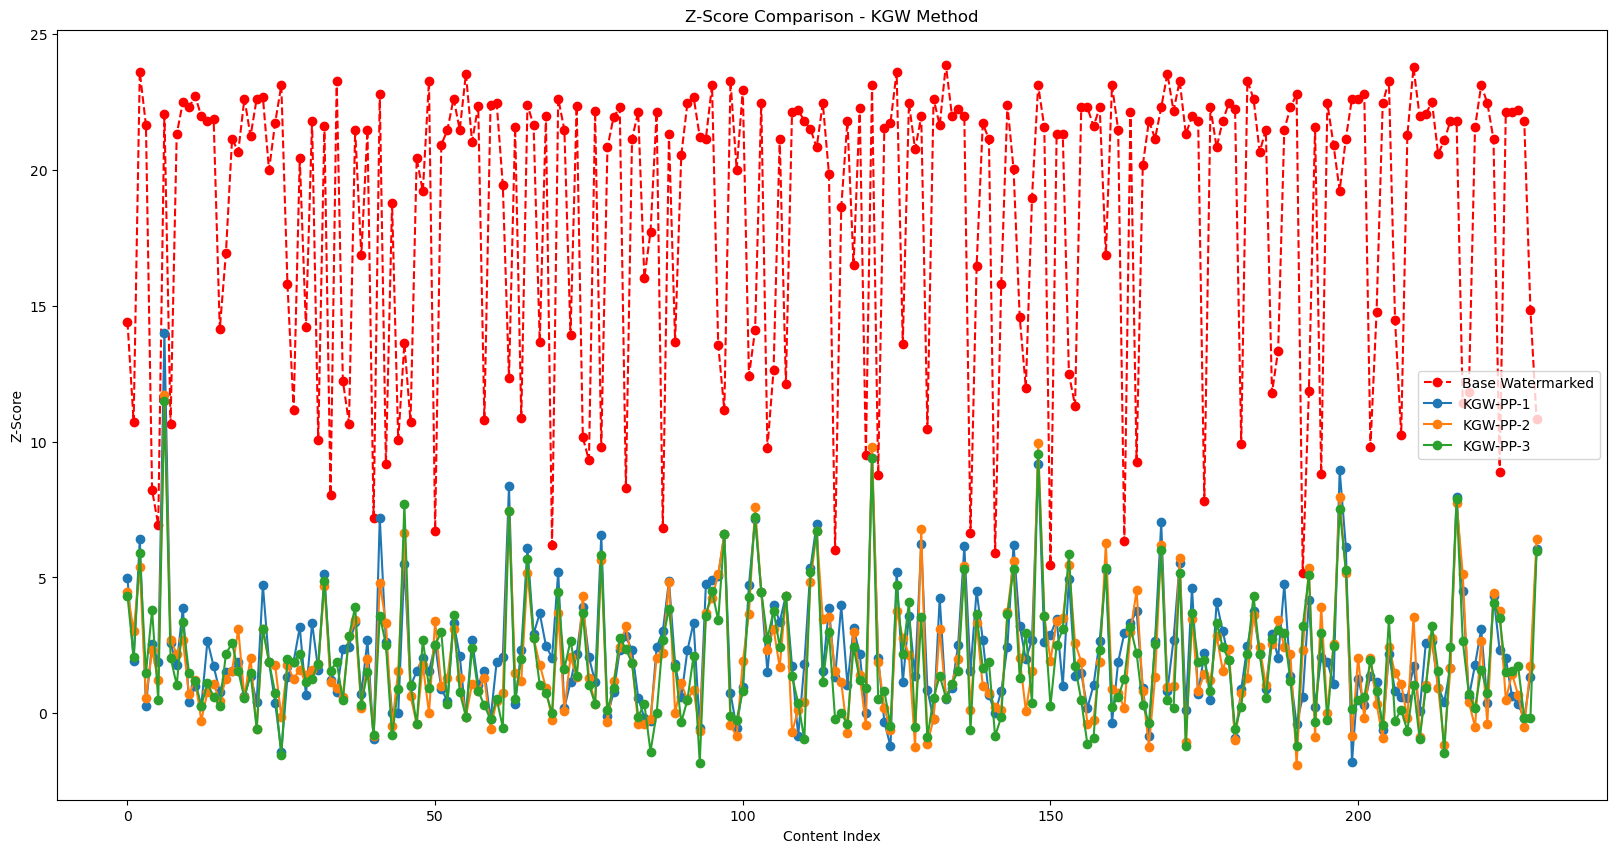

In [10]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kgw_wm_zscore))), kgw_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(no_of_paraphrases):
    axs.plot(list(range(len(non_wm_zscore))), wmarked_paraphrased_scores[i], label=f"KGW-PP-{i+1}", marker='o')

axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - KGW Method")
axs.legend()
# plt.savefig(image_path+"kgw_zscore.png")
plt.show()

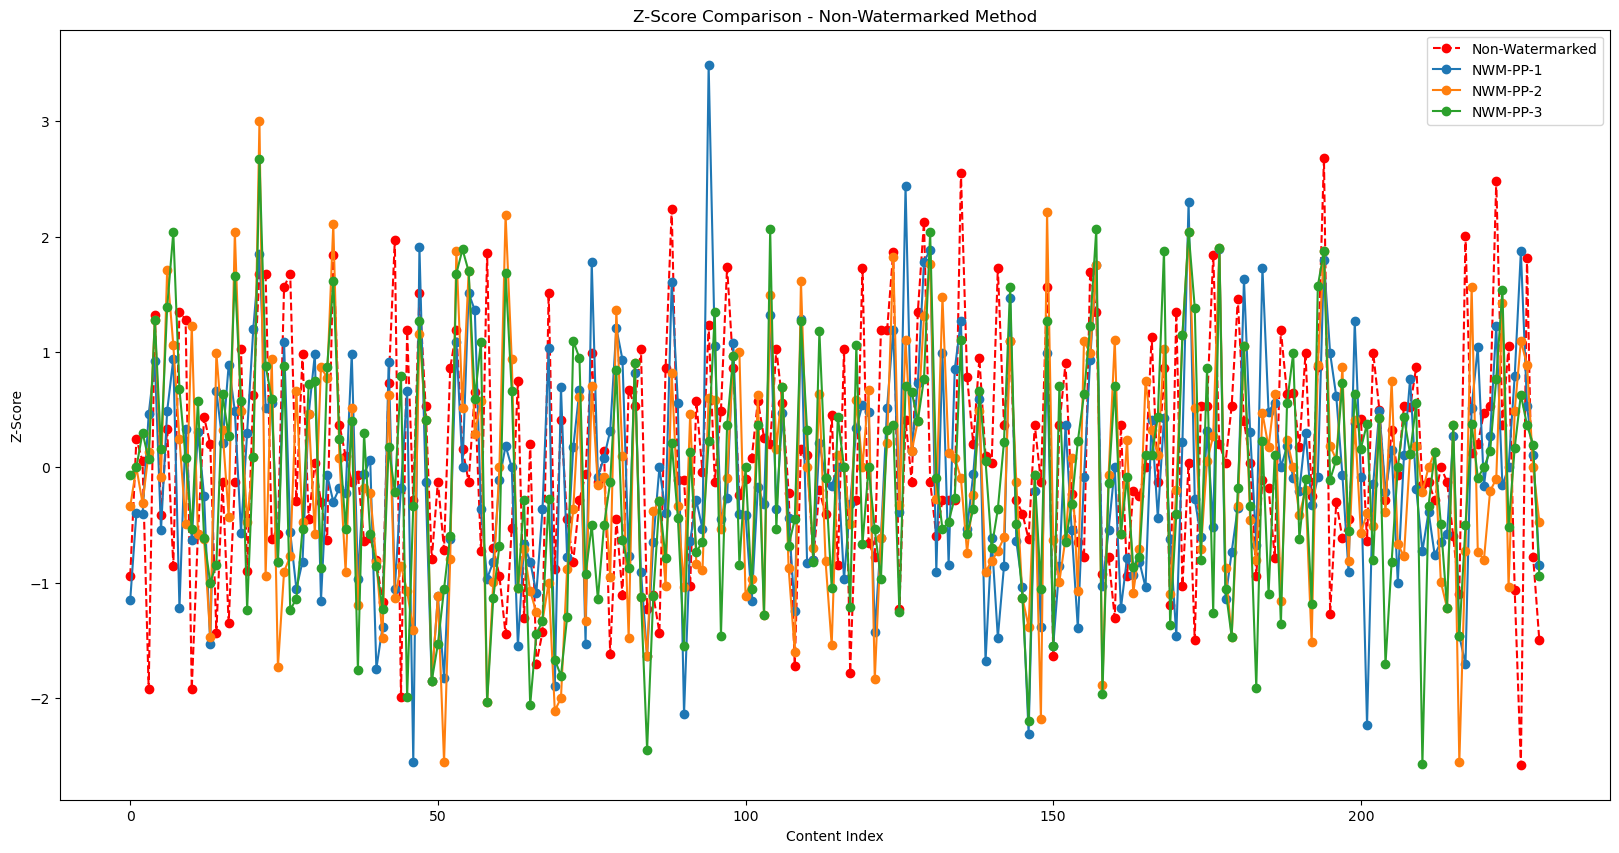

In [12]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(non_wm_zscore))), non_wm_zscore, label="Non-Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(no_of_paraphrases):
    axs.plot(list(range(len(non_wm_zscore))), nmarked_paraphrased_scores[i], label=f"NWM-PP-{i+1}", marker='o')

axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Non-Watermarked Method")
axs.legend()
# plt.savefig(image_path+"kgw_zscore.png")
plt.show()

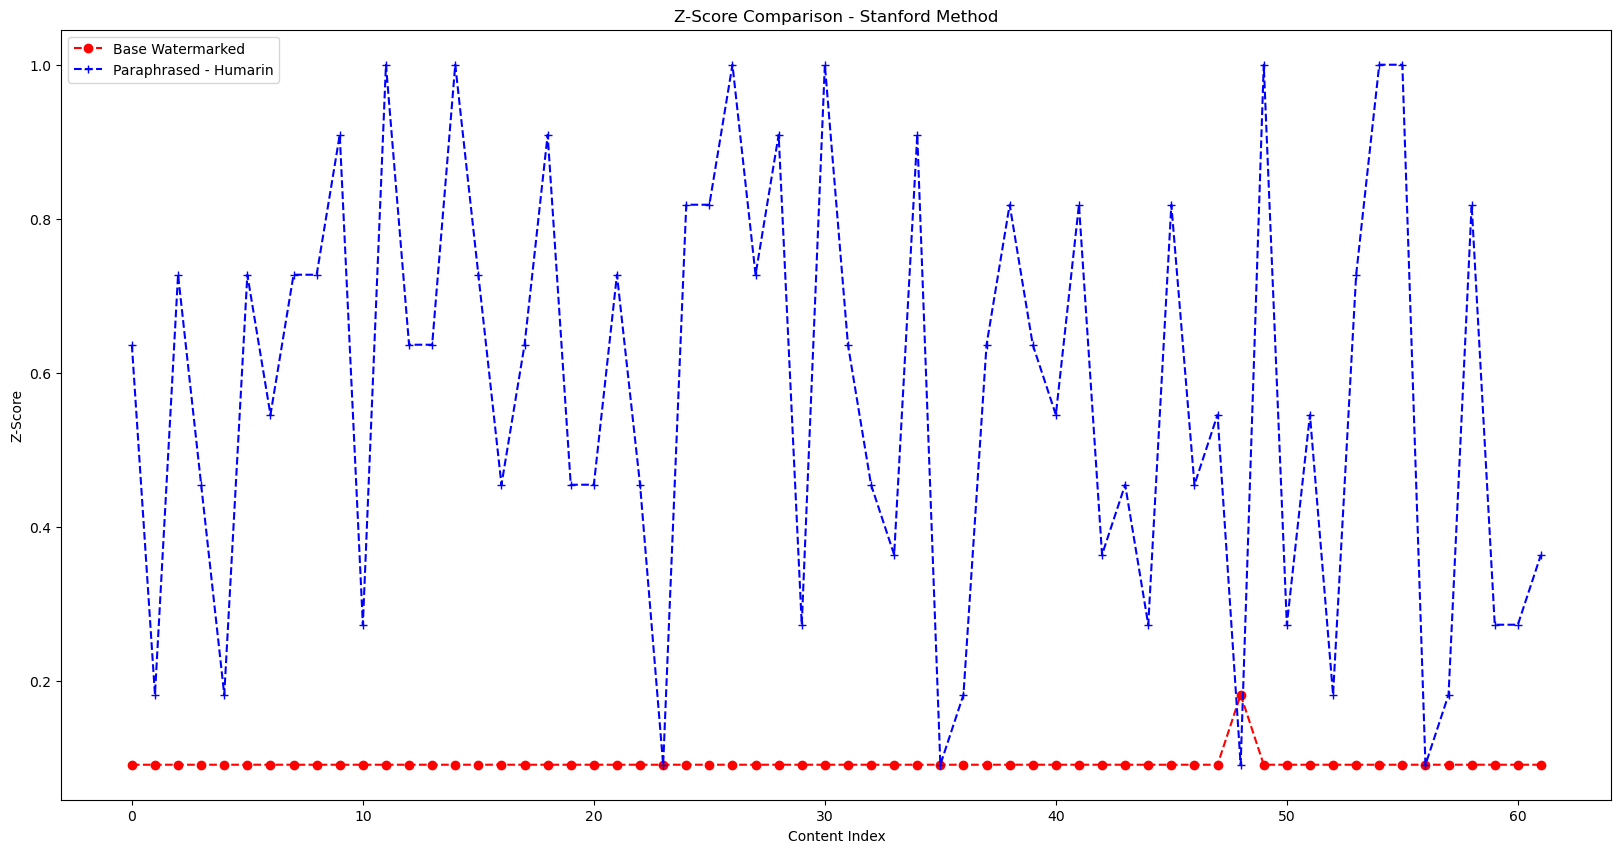

In [26]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kthl_wm_pscore))), kthl_wm_pscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")
axs.plot(list(range(len(kthl_wm_pp_pscore))), kthl_wm_pp_pscore, label="Paraphrased - Humarin", color='blue', marker='+', linestyle="dashed")

axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Stanford Method")
axs.legend()
# plt.savefig(image_path+"kthl.png")
plt.show()